<a href="https://colab.research.google.com/github/jpthirumalai/aiml/blob/master/Thiru_Face_recognition_Questions_Project_CV_AIML_Online.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.2.0-rc1'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Change current working directory to project folder (1 mark)

In [4]:
#### Add your code here ####
import os
#check present working directory
cwd = !pwd
print("Current folder: ",cwd)
%cd '/content/drive/My Drive/AIML/AI/SiameseProject/'
cwd = !pwd
print("Current working directory after seting proj folder: ",cwd)

Current folder:  ['/content']
/content/drive/My Drive/AIML/AI/SiameseProject
Current working directory after seting proj folder:  ['/content/drive/My Drive/AIML/AI/SiameseProject']


### Extract the zip file (5 Marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
import zipfile

In [0]:
# Execute this code only once - which extracts the dataset as images in the directory PINS
zip_ref = zipfile.ZipFile("Aligned Face Dataset from Pinterest.zip", 'r')
zip_ref.extractall("dataset")

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('dataset/PINS')

In [6]:
#Verifying first 5 elements and last 5 elements
print("Printing first 5 elements \n", metadata[0:5])
print("\n\nPrinting last 5 elements \n", metadata[len(metadata)-5:len(metadata)])

Printing first 5 elements 
 [dataset/PINS/pins_Aaron Paul/Aaron Paul101_248.jpg
 dataset/PINS/pins_Aaron Paul/Aaron Paul0_262.jpg
 dataset/PINS/pins_Aaron Paul/Aaron Paul101_247.jpg
 dataset/PINS/pins_Aaron Paul/Aaron Paul137_250.jpg
 dataset/PINS/pins_Aaron Paul/Aaron Paul55_274.jpg]


Printing last 5 elements 
 [dataset/PINS/pins_zendaya/zendaya95.jpg
 dataset/PINS/pins_zendaya/zendaya96.jpg
 dataset/PINS/pins_zendaya/zendaya97.jpg
 dataset/PINS/pins_zendaya/zendaya98.jpg
 dataset/PINS/pins_zendaya/zendaya99.jpg]


### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (5 Marks)
- Load one image using the function "load_image"

In [0]:
import matplotlib.pyplot as plt

Loading image : dataset/PINS/pins_Aaron Paul/Aaron Paul101_248.jpg


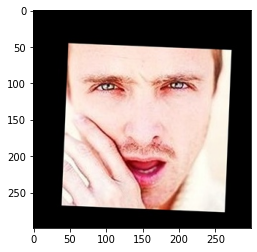

In [9]:
#### Add your code here ####
print("Loading image : "+metadata[0].image_path())
dimg = load_image(metadata[0].image_path())
imgplot = plt.imshow(dimg);

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (5 Marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face()

In [0]:
#### Add your code here ####
#### Add your code here ####
model.load_weights('vgg_face_weights.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [17]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
#### Add your code here ####

errorous_indices = []
empty = np.zeros(2622)

def embedding_creater(imgpath):
  try: #Capturing error while reading the image using try & except
    img = load_image(imgpath.image_path())
    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))

    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  except :
    embedding_vector = empty
    errorous_indices.append(counter)
  return embedding_vector

In [19]:
metadata.shape

(10770,)

In [20]:

embeddings = np.zeros((metadata.shape[0], 2622))
embeddings.shape

(10770, 2622)

In [23]:
from IPython.display import clear_output, display

counter =0 
size = len(metadata)
for i, imagepath in enumerate(metadata):
  embeddings[i]=embedding_creater(imagepath)
  counter += 1
  if(counter%100==0):
    clear_output(wait=True)
    print("{0}% completed, processing {1} of {2}".format(((counter+1)*100/size),counter, size))
#verifying embedding vector of first element


99.35933147632312% completed, processing 10700 of 10770


In [0]:
#Saving the result for future use / transfer learning, so that I need not run VGG for every iteration
np.savez("vgg_result.npz", vggvector=embeddings) 



In [0]:
#Loading vgg vector back
npzfile = np.load("vgg_result.npz")
npzfile.files
embeddings = npzfile['vggvector']

In [17]:
print(embeddings[0])
#print("{0} errors occured, errorous images are at indices : \n{1}".format(len(errorous_indices),errorous_indices))

[ 0.02801892 -0.00112629 -0.01265749 ... -0.00904748 -0.00578399
  0.02125829]


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

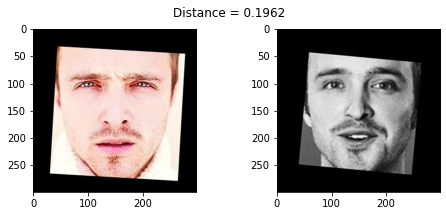

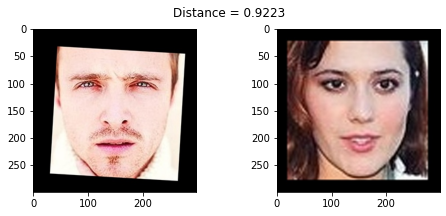

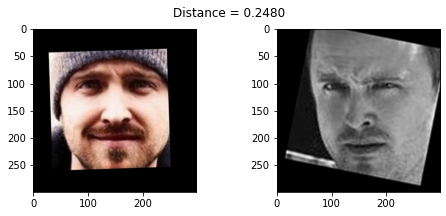

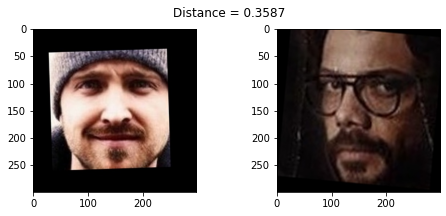

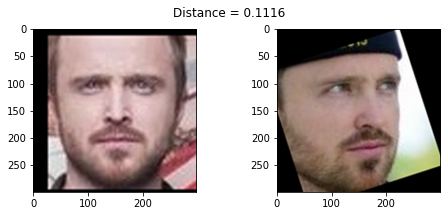

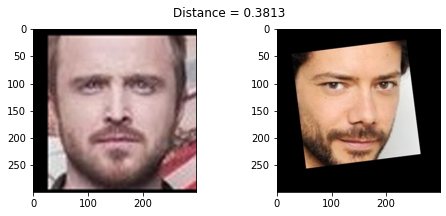

In [19]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.4f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)

show_pair(70, 72)
show_pair(70, 115)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####



In [21]:
train_idx

array([False,  True,  True, ...,  True,  True,  True])

In [0]:
X_train = embeddings[train_idx]
X_test = embeddings[test_idx]

In [23]:
X_train.shape

(9573, 2622)

In [24]:
targets = np.array([m.name for m in metadata])
targets_train= targets[train_idx]
targets_test= targets[test_idx]
targets_train

array(['pins_Aaron Paul', 'pins_Aaron Paul', 'pins_Aaron Paul', ...,
       'pins_zendaya', 'pins_zendaya', 'pins_zendaya'], dtype='<U29')

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [25]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
encoder = LabelEncoder()
encoder.fit(targets)

LabelEncoder()

In [26]:
print("Targets are {0} total number of elements {1}".format(targets,len(targets)))

Targets are ['pins_Aaron Paul' 'pins_Aaron Paul' 'pins_Aaron Paul' ... 'pins_zendaya'
 'pins_zendaya' 'pins_zendaya'] total number of elements 10770


In [27]:
encodedlabels = encoder.transform(targets)
y_train = encodedlabels[train_idx]
y_test = encodedlabels[test_idx]
print(X_train.shape,"::",X_test.shape,"::",y_train.shape,"::",y_test.shape)

(9573, 2622) :: (1197, 2622) :: (9573,) :: (1197,)


### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [28]:
X_train[0:5,:] #Before scale

array([[ 0.03170307, -0.0150513 , -0.01243402, ...,  0.00043141,
         0.00219081, -0.00908097],
       [ 0.03497704, -0.00105059, -0.01248933, ..., -0.01053091,
         0.0017932 ,  0.02439154],
       [ 0.02198225, -0.02106836, -0.00232111, ..., -0.0039725 ,
         0.00130397,  0.01268389],
       [ 0.04994306, -0.00607338, -0.01347909, ...,  0.00112261,
        -0.00353525,  0.01025766],
       [ 0.0152007 , -0.00736611, -0.0082632 , ..., -0.0024536 ,
         0.00291812,  0.00216718]])

In [29]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled[0:5,:] #After scaled

scaler2 = StandardScaler().fit(X_test)
X_test_scaled = scaler2.fit_transform(X_test)
X_test_scaled[0:5,:] #Scaling test as well as are about to do PCA

array([[ 1.80338521, -0.05734668, -1.51339583, ...,  0.51550444,
        -1.08178756,  0.58835484],
       [ 1.45889481, -1.24059776, -0.42358499, ..., -0.7010824 ,
         0.2350157 ,  0.26711884],
       [ 0.80271433, -0.21342637,  0.0693113 , ...,  1.1957597 ,
         0.18019548, -0.13759133],
       [ 1.81017179, -0.53995939, -0.99417936, ...,  1.35673693,
        -0.41861045, -0.50916233],
       [ 1.9551949 , -0.10418514,  0.03144191, ...,  1.39545122,
         0.17739158, -0.67482886]])

### Reduce dimensions using PCA (5 Marks)
- Reduce feature dimensions using Principal Component Analysis

In [30]:
X_train_scaled.shape

(9573, 2622)

In [0]:
from sklearn.decomposition import PCA

#### Add your code here ####

# Compute a PCA 
n_components = 900
pca = PCA(n_components=n_components, whiten=True).fit(X_train_scaled)

X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled) #Apply same pca to test as well

In [35]:
X_train_pca.shape

(9573, 900)

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [83]:
from sklearn.svm import SVC

#### Add your code here ####  
#This ieration is first ieration and below, tuning SVC parameters using GridSearchCV
svc = SVC()

svc.fit(X_train_pca, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
#acc_svc = accuracy_score(y_test, svc.predict(X_test_pca))

#print(f'SVM accuracy = {acc_svc}')


y_pred = svc.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       1.00      0.85      0.92        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8
           7       0.82      1.00      0.90        14
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00         9
          10       0.86      0.92      0.89        13
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00         9
          13       1.00      0.70      0.82        10
          14       0.94      1.00      0.97        16
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00        13
          17       0.88    

### <font color="maroon"> Parameter tuning for SVC <font>

Best parameter are as fond below 
<pre class="output_text stream output-id-244"> <font color="blue">SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)</pre></font>

In [0]:
from sklearn.model_selection import GridSearchCV
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train_scaled)

X_train_pca100 = pca.transform(X_train_scaled)
X_test_pca100 = pca.transform(X_test_scaled)

In [99]:


param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train_pca100,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 49.2min finished


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## <font color="red">Results</font>

<div style="height:200px;width:900px;overflow:auto;background-color:yellowgreen;color:white;scrollbar-base-color:gold;font-family:sans-serif;padding:10px;">

<pre class="output_text stream output-id-1">Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
</pre>
<pre class="output_text stream output-id-2">[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
</pre>
<pre class="output_text stream output-id-3">[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
</pre>
<pre class="output_text stream output-id-4">[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s
</pre>
<pre class="output_text stream output-id-242">[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  23.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.6s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.8s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.7s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.5s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   8.5s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  11.5s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  11.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  11.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  11.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  11.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  23.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  23.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  23.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  23.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  23.2s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   8.6s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   8.5s
[CV] C=0.1, gamma=0.1, kernel=poly ...................................
[CV] .................... C=0.1, gamma=0.1, kernel=poly, total=   8.6s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=  11.2s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=  11.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=  11.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=  11.1s
[CV] C=0.1, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=0.1, gamma=0.1, kernel=sigmoid, total=  11.1s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  16.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  17.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  16.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  16.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  17.0s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=  14.5s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=  14.6s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=  14.5s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=  14.5s
[CV] C=0.1, gamma=0.01, kernel=poly ..................................
[CV] ................... C=0.1, gamma=0.01, kernel=poly, total=  14.5s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=  12.9s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=  13.0s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=  13.1s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=  12.9s
[CV] C=0.1, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=0.1, gamma=0.01, kernel=sigmoid, total=  12.9s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  20.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  20.6s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  20.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  20.5s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=0.001, kernel=rbf, total=  20.4s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=  15.5s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=  15.7s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=  15.6s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=  15.5s
[CV] C=0.1, gamma=0.001, kernel=poly .................................
[CV] .................. C=0.1, gamma=0.001, kernel=poly, total=  15.4s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=  20.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=  20.0s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=  19.9s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=  19.9s
[CV] C=0.1, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=  20.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  23.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  23.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  23.9s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  24.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=  24.0s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   8.7s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   8.8s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   8.7s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   8.6s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   8.7s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   8.1s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   8.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   8.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   8.0s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ..................... C=1, gamma=1, kernel=sigmoid, total=   8.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=  24.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=  24.2s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=  23.9s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=  23.7s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV] ....................... C=1, gamma=0.1, kernel=rbf, total=  23.9s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   8.5s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV] ...................... C=1, gamma=0.1, kernel=poly, total=   8.5s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   6.8s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   6.7s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   6.8s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   6.8s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV] ................... C=1, gamma=0.1, kernel=sigmoid, total=   6.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  10.8s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ...................... C=1, gamma=0.01, kernel=rbf, total=  10.7s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   9.8s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   9.9s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   9.8s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   9.9s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ..................... C=1, gamma=0.01, kernel=poly, total=   9.8s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   6.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   6.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   6.0s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   5.9s
[CV] C=1, gamma=0.01, kernel=sigmoid .................................
[CV] .................. C=1, gamma=0.01, kernel=sigmoid, total=   5.9s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  10.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  10.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  10.1s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  10.3s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=  10.2s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=  15.9s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=  16.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=  15.9s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=  16.0s
[CV] C=1, gamma=0.001, kernel=poly ...................................
[CV] .................... C=1, gamma=0.001, kernel=poly, total=  16.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=  12.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=  12.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=  12.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=  12.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=  12.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  24.8s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  24.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  24.7s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  25.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=  24.8s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   8.6s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   8.7s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   8.7s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   8.6s
[CV] C=10, gamma=1, kernel=poly ......................................
[CV] ....................... C=10, gamma=1, kernel=poly, total=   8.7s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   7.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   7.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   7.0s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   7.1s
[CV] C=10, gamma=1, kernel=sigmoid ...................................
[CV] .................... C=10, gamma=1, kernel=sigmoid, total=   7.2s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  23.9s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  23.9s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  23.8s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  23.7s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ...................... C=10, gamma=0.1, kernel=rbf, total=  23.7s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   8.6s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   8.5s
[CV] C=10, gamma=0.1, kernel=poly ....................................
[CV] ..................... C=10, gamma=0.1, kernel=poly, total=   8.5s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   5.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   5.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   5.2s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   5.3s
[CV] C=10, gamma=0.1, kernel=sigmoid .................................
[CV] .................. C=10, gamma=0.1, kernel=sigmoid, total=   5.2s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  10.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  10.5s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ..................... C=10, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   8.6s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   8.7s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   8.7s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   8.6s
[CV] C=10, gamma=0.01, kernel=poly ...................................
[CV] .................... C=10, gamma=0.01, kernel=poly, total=   8.6s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   5.2s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   5.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   5.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   5.1s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV] ................. C=10, gamma=0.01, kernel=sigmoid, total=   5.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   6.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   6.2s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   6.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   6.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .................... C=10, gamma=0.001, kernel=rbf, total=   6.2s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=  15.9s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=  16.1s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=  15.9s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=  16.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV] ................... C=10, gamma=0.001, kernel=poly, total=  15.9s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   6.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   6.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   6.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   6.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   6.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  24.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  24.4s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  24.6s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  24.5s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=  24.4s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   8.6s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   8.7s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   8.6s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   8.5s
[CV] C=100, gamma=1, kernel=poly .....................................
[CV] ...................... C=100, gamma=1, kernel=poly, total=   8.6s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   7.0s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   6.9s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   6.8s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   6.8s
[CV] C=100, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=100, gamma=1, kernel=sigmoid, total=   6.8s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  23.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  23.8s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  23.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  23.7s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=  23.8s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   8.6s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   8.7s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   8.6s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   8.5s
[CV] C=100, gamma=0.1, kernel=poly ...................................
[CV] .................... C=100, gamma=0.1, kernel=poly, total=   8.6s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   5.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   5.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   5.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   5.0s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] ................. C=100, gamma=0.1, kernel=sigmoid, total=   5.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=  10.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=  10.5s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=  10.6s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   8.7s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   8.6s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   8.5s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ................... C=100, gamma=0.01, kernel=poly, total=   8.6s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   5.2s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   5.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   5.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   5.1s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ................ C=100, gamma=0.01, kernel=sigmoid, total=   5.1s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   5.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   6.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   6.0s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   5.9s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV] ................... C=100, gamma=0.001, kernel=rbf, total=   6.0s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=  14.3s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=  14.4s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=  14.3s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=  14.3s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=  14.3s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   5.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   5.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   5.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   5.5s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   5.5s
</pre>
<pre class="output_text stream output-id-243">[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 49.2min finished
</pre>
<pre class="output_text stream output-id-244">SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)</pre>
</div>  

In [37]:
#Fit after grid search CV(next ieration) using tuned parameter
from sklearn.svm import SVC
svc_tuned = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc_tuned.fit(X_train_pca100, y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
#predict using fine tuned svc_tuned classifier

from sklearn.metrics import classification_report

y_pred_tuned = svc_tuned.predict(X_test_pca100)
print(classification_report(y_test, y_pred_tuned))


              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       1.00      1.00      1.00        10
           2       0.92      0.85      0.88        13
           3       1.00      0.92      0.96        13
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         8
           7       0.93      0.93      0.93        14
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00         9
          10       0.80      0.92      0.86        13
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00         9
          13       0.88      0.70      0.78        10
          14       1.00      1.00      1.00        16
          15       1.00      1.00      1.00        14
          16       1.00      1.00      1.00        13
          17       0.93    

Thorugh Pramater tuning achieved better result as follows:<br>
<table border="0">
<tbody>
<tr>
<td style="text-align: center;"><font color ="#ff0000">Befor Tuning results</font></td>
<td style="text-align: center;"><strong><font color ="#339966">After Tuning results</font></strong></td>
</tr>
<tr>
<td>
<p><span><span>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; precision&nbsp; &nbsp;recall&nbsp; f1-score support</span></span></p>
<p><span>accuracy&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;0.93&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1197 </span></p>
<p><span>macro avg&nbsp; &nbsp; &nbsp; 0.96&nbsp; &nbsp; &nbsp; &nbsp;0.92&nbsp; &nbsp; 0.93&nbsp; &nbsp; &nbsp; 1197 </span></p>
<p><span>weighted avg&nbsp; 0.95&nbsp; &nbsp; &nbsp; &nbsp;0.93&nbsp; &nbsp; 0.94&nbsp; &nbsp; &nbsp; 1197</span></p>
</td>
<td>
<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; precision&nbsp; &nbsp;recall&nbsp; f1-score support</p>
<p>accuracy&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;0.96&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; 1197</p>
<p>macro avg&nbsp; &nbsp; &nbsp; 0.97&nbsp; &nbsp; &nbsp; 0.96&nbsp; &nbsp; &nbsp;0.96&nbsp; &nbsp; &nbsp; 1197</p>
<p>weighted avg&nbsp; 0.96&nbsp; &nbsp; &nbsp; 0.96&nbsp; &nbsp; &nbsp;0.96&nbsp; &nbsp; &nbsp; 1197</p>
</td>
</tr>
</tbody>
</table>


### Test results (2 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

Loading image : dataset/PINS/pins_Alvaro Morte/Alvaro Morte160_802.jpg


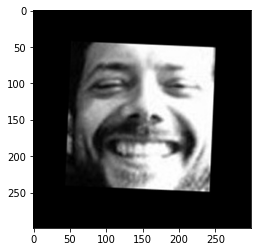

In [40]:
# test_target_names = targets[test_idx]
# print("Loading image : "+test_target_names[10])
# imgplot = plt.imshow(X_test[10].reshape(57,46)); #this is to see features after pca

test_index =10
X_test_images = metadata[test_idx]
print("Loading image : "+X_test_images[test_index].image_path())
dimg = load_image(X_test_images[test_index].image_path())
imgplot = plt.imshow(dimg);

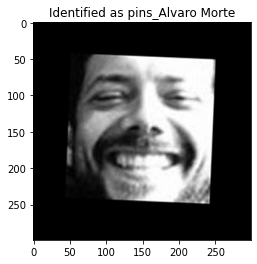

In [41]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = svc_tuned.predict([X_test_pca100[example_idx]]) 
example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');